In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import *
from math import sqrt, pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Quick Exercises 1

### 1. Write down the tensor product of the qubits:
 a. |0⟩|1⟩
        $$ \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} $$
 b. |0⟩|+⟩
        $$ \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix} $$
 c. |+⟩|1⟩ 
        $$ \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \end{bmatrix} $$
 d. |−⟩|+⟩
        $$ \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ -1 \\ -1 \end{bmatrix} $$

### 2. Write the state: $$ |\psi⟩= \frac{1}{\sqrt{2}} |00⟩+ \frac{i}{\sqrt{2}} |01⟩ $$ as two separate qubits

This is simply a matter of expanding the tensor product. The answer is apparent when completed 
$$ |\psi⟩= \frac{1}{\sqrt{2}} |00⟩+ \frac{i}{\sqrt{2}} |01⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \\ 0 \\ 0 \end{bmatrix} = |0⟩|\circlearrowright⟩ $$

## Quick Exercises 2

### 1. Calculate the single qubit unitary (U) created by the sequence of gates: U=XZH. Use Qiskit's unitary simulator to check your results.

$$ \displaystyle U = XZH = \frac{1}{\sqrt{2}}  \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}  \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} -1 & 1 \\ 1 & 1 \end{bmatrix}$$

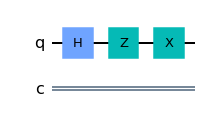

In [4]:
circuit21 = QuantumCircuit(1, 1)
circuit21.h(0)
circuit21.z(0)
circuit21.x(0)
circuit21.draw('mpl')

In [5]:
from qiskit_textbook.tools import array_to_latex
unitarySim = Aer.get_backend('unitary_simulator')
matrixcircuit21 =  execute(circuit21, backend = unitarySim).result().get_unitary()
array_to_latex(matrixcircuit21, pretext="\\text{circuit21 = } ")

<IPython.core.display.Math object>

### 2. Try changing the gates in the circuit above. Calculate their tensor product, and then check your answer using the unitary simulator.

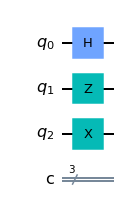

In [8]:
circuit22 = QuantumCircuit(3, 3)
circuit22.h(0)
circuit22.z(1)
circuit22.x(2)
circuit22.draw('mpl')

In [9]:
matrixcircuit22 =  execute(circuit22, backend = unitarySim).result().get_unitary()
array_to_latex(matrixcircuit22, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

## Quick Exercises 3

### 1. Create a quantum circuit that produces the Bell state: $ \frac{1}{\sqrt{2}}(|01⟩+|10⟩)$. Use the statevector simulator to verify your result.

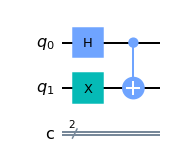

In [23]:
circuit31 = QuantumCircuit(2, 2)
circuit31.x(1)
circuit31.h(0)
circuit31.cx(0, 1)
circuit31.draw('mpl')

In [24]:
svsim = Aer.get_backend('statevector_simulator')
finalSV = execute(circuit31, backend = svsim).result().get_statevector()
array_to_latex(finalSV, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

### 2. The circuit you created in question 1 transforms the state |00⟩ to $ \frac{1}{\sqrt{2}} (|01⟩+|10⟩)$, calculate the unitary of this circuit using Qiskit's simulator. Verify this unitary does in fact perform the correct transformation.

In [25]:
matrixcircuit31 =  execute(circuit31, backend = unitarySim).result().get_unitary()
array_to_latex(matrixcircuit31, pretext="U_{31} = ")

<IPython.core.display.Math object>

Now that we have the circuit's unitary matrix, we only need to multiply by the initial state vector. Define the map $ T : \mathbf{C}^4 \to \mathbf{C}^4 $ as 
$$ T(x) = U_{31} \cdot x = \begin{bmatrix}
0 & 0 & \tfrac{1}{\sqrt{2}} & \tfrac{1}{\sqrt{2}}  \\
\tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}} & 0 & 0  \\
\tfrac{1}{\sqrt{2}} & \tfrac{1}{\sqrt{2}} & 0 & 0  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}}  \\
\end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} $$ 
The input state vector will be |00⟩. We feed this into T
$$ T(|00⟩ ) = \begin{bmatrix}
0 & 0 & \tfrac{1}{\sqrt{2}} & \tfrac{1}{\sqrt{2}}  \\
\tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}} & 0 & 0  \\
\tfrac{1}{\sqrt{2}} & \tfrac{1}{\sqrt{2}} & 0 & 0  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}}  \\
\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0\end{bmatrix} $$ 

### 3. Think about other ways you could represent a statevector visually. Can you design an interesting visualization from which you can read the magnitude and phase of each amplitude?

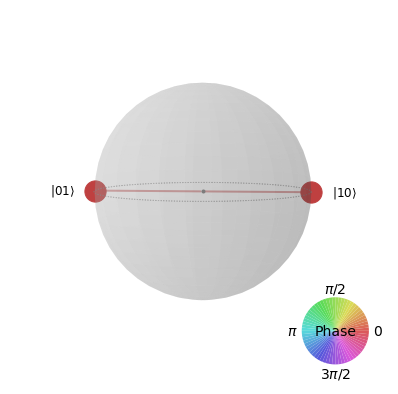

In [26]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(finalSV)

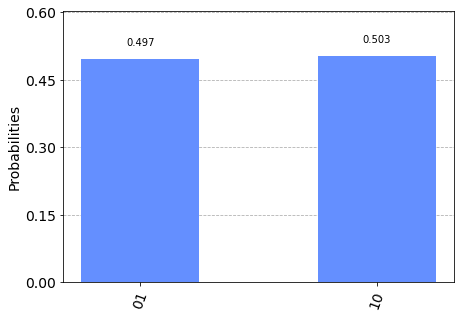

In [28]:
circuit31.measure([0, 1], [0, 1])
qasmSim = Aer.get_backend('qasm_simulator')
counts = execute(circuit31, backend = qasmSim, shots = 1024).result().get_counts()
plot_histogram(counts)